In [2]:
# Importing our required libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [3]:
# Exploring the Iris dataset

iris = datasets.load_iris()
type(iris) # sklearn.datasets.base.Bunch - a dictionary-like object with key-value pairs

print(iris.keys()) # dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

type(iris.data) # numpy.ndarray
type(iris.target) # numpy.ndarray)

iris.data.shape # (150, 4) - 150 rows and 4 columns

iris.target_names # array(['setosa', 'versicolor', 'virginica'], dtype='<U10') these will be encoded as 0, 1, 2

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Setting our features to X and our target variables to y
X = iris.data
y = iris.target



In [5]:
# Create the dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head()) # print the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


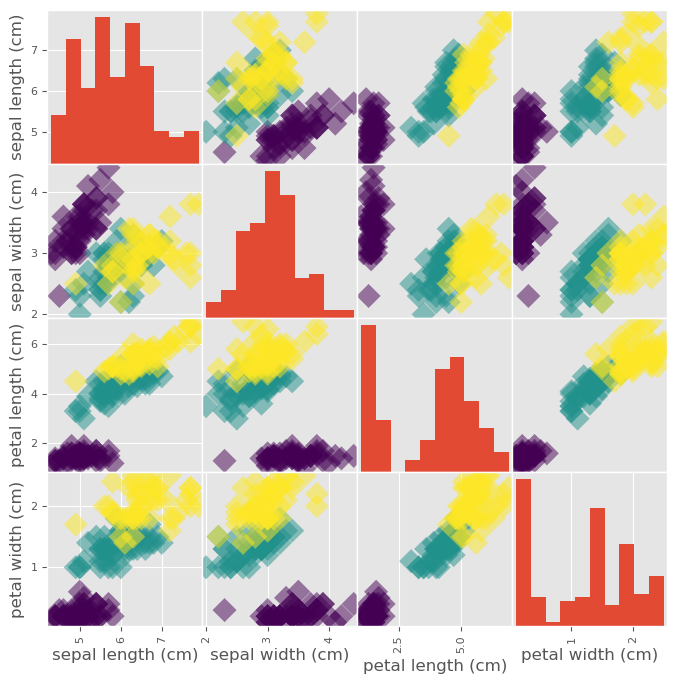

In [6]:

# Help visualize the data.
# c stands for color so we display color by species.
# figsize will be the size of the figure.
# marker is the shape of the points.
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')

# Diagonal line are histograms of the features corresponding the rows and columns.
# The rest of the lines are scatter plots of the column feature vs the row feature color by target variable.
# We can see that petalwidth and petallength are highly correlated.
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

# Use the function to randomly split out data into a training set and a test set.
# We can reproduce the split we did in the first example by setting the random_state keyword arg.
# @see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Set this to create boundaries based on 8 closest neight.
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Prints list with predictions of the test set labels (encoded as ints).
print(y_pred)

# Checking the score 

knn.score(X_test, y_test)

[1 0 0 0 1 0 1 2 2 2 0 2 1 0 0 0 1 2 2 1 0 1 2 1 0 0 0 2 2 2 1 2 0 1 2 0 2
 1 0 2 1 1 1 1 2]


1.0

In [41]:
# A set of unlabeled data.
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])

# Showing the data frame
df_new = pd.DataFrame(X_new, columns=iris.feature_names)
print(df_new.head()) # print unlabeled data as a data frame

prediction = knn.predict(X_new)
X_new.shape # (1, 4) - 1 data point and 4 features (assuming in the example about you just used the first example and not more)

print(prediction) # array([0]) - 0 is the label for the first example which will map to one of the iris labels

# The prediction is [1 1 0] which maps to [versicolor versicolor setosa]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.6               2.8                3.9               1.1
1                5.7               2.6                3.8               1.3
2                4.7               3.2                1.3               0.2
[1 1 0]
